**SQL for Data Retrieval**  

In [ ]:
import sqlite3

# Connect to the database (or create it)
conn = sqlite3.connect('example.db')
cursor = conn.cursor()

# Create a sample table
cursor.execute('''
CREATE TABLE IF NOT EXISTS employees (
    id INTEGER PRIMARY KEY,
    name TEXT,
    department TEXT,
    salary REAL
)
''')

# Insert some sample data
cursor.executemany('''
INSERT INTO employees (name, department, salary) VALUES (?, ?, ?)
''', [
    ('Alice', 'HR', 70000),
    ('Bob', 'IT', 80000),
    ('Charlie', 'Finance', 65000),
    ('Diana', 'IT', 85000),
    ('Evan', 'HR', 72000)
])

conn.commit()

# Example SQL query: Retrieve all employees with salary > 70000
query = '''
SELECT name, department, salary
FROM employees
WHERE salary > 70000
'''

# Execute the query
cursor.execute(query)

# Fetch and print results
results = cursor.fetchall()
for row in results:
    print(row)

# Close connection
conn.close()

('Bob', 'IT', 80000.0)
('Diana', 'IT', 85000.0)
('Evan', 'HR', 72000.0)


**SELECT, WHERE, JOIN**

In [ ]:
import sqlite3

# Connect to the database (or create it)
conn = sqlite3.connect('example.db')
cursor = conn.cursor()

# Create a sample table
cursor.execute('''
CREATE TABLE IF NOT EXISTS employees (
    id INTEGER PRIMARY KEY,
    name TEXT,
    department TEXT,
    salary REAL
)
''')

# Insert some sample data
cursor.executemany('''
INSERT INTO employees (name, department, salary) VALUES (?, ?, ?)
''', [
    ('Alice', 'HR', 70000),
    ('Bob', 'IT', 80000),
    ('Charlie', 'Finance', 65000),
    ('Diana', 'IT', 85000),
    ('Evan', 'HR', 72000)
])

conn.commit()

# Example SQL query: Retrieve all employees with salary > 70000
query = '''
SELECT name, department, salary
FROM employees
WHERE salary > 70000
'''

# Execute the query
cursor.execute(query)

# Fetch and print results
results = cursor.fetchall()
for row in results:
    print(row)

# Close connection
conn.close()

**GROUP BY, HAVING**

In [ ]:
import pandas as pd

# Sample data
data = {
    'Category': ['A', 'A', 'B', 'B', 'C', 'C', 'A'],
    'Values': [10, 15, 10, 20, 5, 8, 12]
}

df = pd.DataFrame(data)

# Group by 'Category' and calculate sum of 'Values'
grouped = df.groupby('Category')['Values'].sum().reset_index()

# Apply a condition similar to HAVING (e.g., sum > 20)
result = grouped[grouped['Values'] > 20]

print(result)

  Category  Values
0        A      37
1        B      30


**Subqueries & CTEs**

In [ ]:
import sqlite3

# Connect to database (or create in memory)
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create tables
cursor.execute('''
CREATE TABLE employees (
    id INTEGER PRIMARY KEY,
    name TEXT,
    department_id INTEGER,
    salary INTEGER
)
''')

cursor.execute('''
CREATE TABLE departments (
    id INTEGER PRIMARY KEY,
    name TEXT
)
''')

# Insert sample data
employees = [
    (1, 'Alice', 1, 70000),
    (2, 'Bob', 2, 60000),
    (3, 'Charlie', 1, 80000),
    (4, 'David', 3, 55000)
]

departments = [
    (1, 'HR'),
    (2, 'Engineering'),
    (3, 'Sales')
]

cursor.executemany('INSERT INTO employees VALUES (?, ?, ?, ?)', employees)
cursor.executemany('INSERT INTO departments VALUES (?, ?)', departments)

# Query with subquery
query = '''
SELECT name, salary
FROM employees
WHERE salary > (SELECT AVG(salary) FROM employees)
'''

cursor.execute(query)
results = cursor.fetchall()

for row in results:
    print(row)

('Alice', 70000)
('Charlie', 80000)


In [ ]:
query_cte = '''
WITH dept_salaries AS (
    SELECT department_id, SUM(salary) AS total_salary
    FROM employees
    GROUP BY department_id
)
SELECT d.name, ds.total_salary
FROM dept_salaries ds
JOIN departments d ON ds.department_id = d.id
'''

cursor.execute(query_cte)
results = cursor.fetchall()

for row in results:
    print(row)

('HR', 150000)
('Engineering', 60000)
('Sales', 55000)


**Window Function**

In [ ]:
import pandas as pd

# Sample DataFrame
data = {
    'category': ['A', 'A', 'A', 'B', 'B', 'B'],
    'value': [10, 20, 30, 40, 50, 60],
    'date': pd.date_range('2024-01-01', periods=6)
}

df = pd.DataFrame(data)

# Set index if needed
df.set_index('date', inplace=True)

# 1. Rolling sum over a window of size 2
df['rolling_sum'] = df['value'].rolling(window=2).sum()

# 2. Cumulative sum within each category (using groupby + cumsum)
df['cum_sum_category'] = df.groupby('category')['value'].cumsum()

# 3. Expanding mean (cumulative average)
df['expanding_mean'] = df['value'].expanding().mean()

# 4. Using a custom window function with rolling apply
def custom_func(window):
    return window.max() - window.min()

df['--------range--------'] = df['value'].rolling(window=3).apply(custom_func)

print(df)

           category  value  rolling_sum  cum_sum_category  expanding_mean  \
date                                                                        
2024-01-01        A     10          NaN                10            10.0   
2024-01-02        A     20         30.0                30            15.0   
2024-01-03        A     30         50.0                60            20.0   
2024-01-04        B     40         70.0                40            25.0   
2024-01-05        B     50         90.0                90            30.0   
2024-01-06        B     60        110.0               150            35.0   

            --------range--------  
date                               
2024-01-01                    NaN  
2024-01-02                    NaN  
2024-01-03                   20.0  
2024-01-04                   20.0  
2024-01-05                   20.0  
2024-01-06                   20.0  


**Data Visualization**

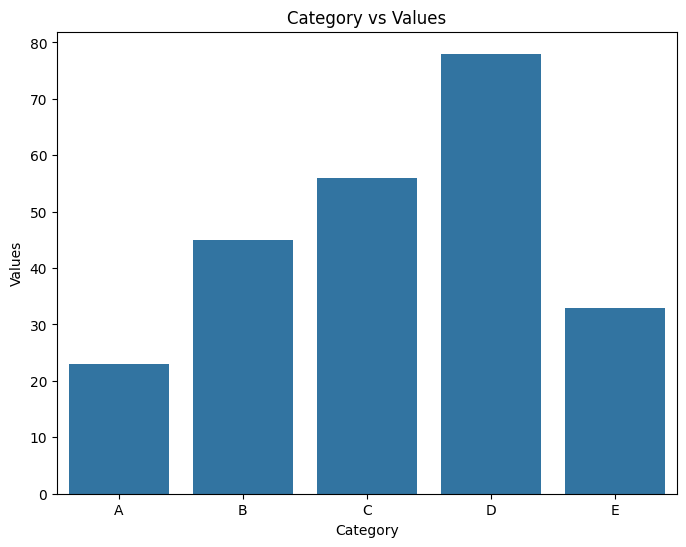

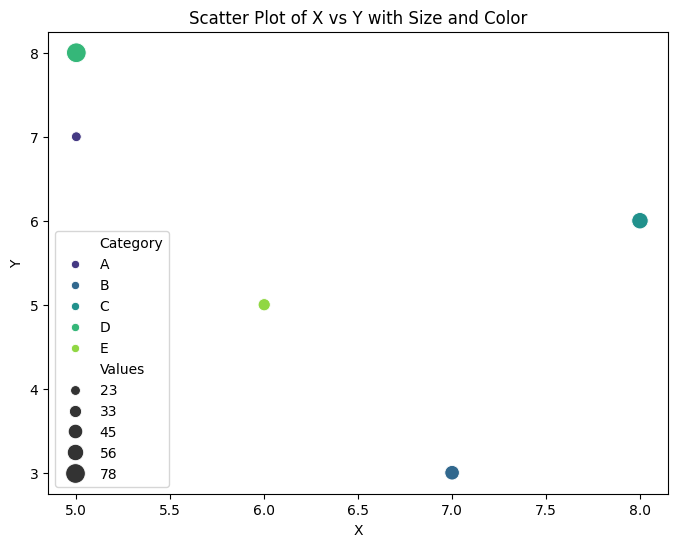

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample Data
data = {
    'Category': ['A', 'B', 'C', 'D', 'E'],
    'Values': [23, 45, 56, 78, 33],
    'X': [5, 7, 8, 5, 6],
    'Y': [7, 3, 6, 8, 5]
}

df = pd.DataFrame(data)

# Bar Chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Values', data=df)
plt.title('Category vs Values')
plt.show()

# Scatter Plot with Customization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='X', y='Y', size='Values', hue='Category', data=df, palette='viridis', sizes=(50, 200))
plt.title('Scatter Plot of X vs Y with Size and Color')
plt.legend()
plt.show()

#**Tableau or Power BI**

**Tableau**

In [7]:
import pandas as pd

# Sample data
data = {'Category': ['A', 'A', 'B', 'B', 'C', 'C'],
        'Value': [10, 15, 20, 25, 30, 35]}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file (or other suitable format)
df.to_csv('data.csv', index=False)
print(df)


  Category  Value
0        A     10
1        A     15
2        B     20
3        B     25
4        C     30
5        C     35


**Power BI**

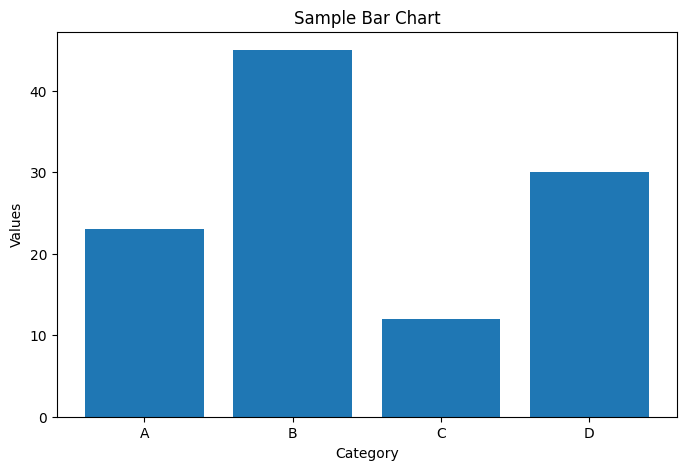

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data: replace with your data source or DataFrame
data = {
    'Category': ['A', 'B', 'C', 'D'],
    'Values': [23, 45, 12, 30]
}
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(df['Category'], df['Values'])
plt.title('Sample Bar Chart')
plt.xlabel('Category')
plt.ylabel('Values')
plt.show()

#**Charts, Maps**

**1. Charts with Matplotlib and Seaborn**


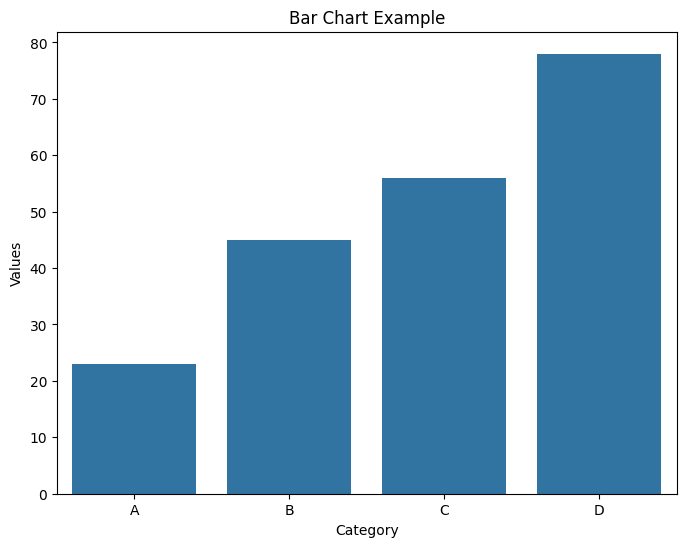

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data
data = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'D'],
    'Values': [23, 45, 56, 78]
})

# Bar chart
plt.figure(figsize=(8,6))
sns.barplot(x='Category', y='Values', data=data)
plt.title('Bar Chart Example')
plt.show()

**2. Maps with Plotly**


In [10]:
import plotly.express as px

# Sample geo data (world map with some points)
df = px.data.gapminder().query("year==2007")
fig = px.scatter_geo(df, locations='iso_alpha',
                     hover_name='country',
                     size='pop',
                     projection='natural earth',
                     title='World Population in 2007')
fig.show()

#**Drilldowns & Interactions**  

**Drilldowns Bar Chart with Plotly**

In [23]:
import plotly.graph_objects as go
import pandas as pd

# Sample data
data = {
    'Category': ['Fruits', 'Fruits', 'Fruits', 'Vegetables', 'Vegetables', 'Vegetables'],
    'Subcategory': ['Apples', 'Oranges', 'Bananas', 'Carrots', 'Broccoli', 'Spinach'],
    'Value': [10, 15, 7, 12, 9, 5]
}

df = pd.DataFrame(data)

# Aggregate data for main categories
category_data = df.groupby('Category')['Value'].sum().reset_index()

# Aggregate data for subcategories
subcat_data = df

# Create initial figure with main categories
fig = go.Figure()

# Add main category bar
fig.add_trace(go.Bar(
    x=category_data['Category'],
    y=category_data['Value'],
    name='Categories',
    customdata=category_data['Category'],
    hoverinfo='x+y'
))

# Define layout
fig.update_layout(
    title='Drilldown Example: Categories to Subcategories',
    xaxis_title='Category',
    yaxis_title='Value'
)

# Function to update figure for subcategories
def create_subcategory_bars(category):
    filtered = subcat_data[subcat_data['Category'] == category]
    return go.Figure(data=[
        go.Bar(
            x=filtered['Subcategory'],
            y=filtered['Value'],
            name=f'Subcategories of {category}'
        )
    ],
    layout=go.Layout(
        title=f'Subcategories of {category}',
        xaxis_title='Subcategory',
        yaxis_title='Value'
    ))

# Add click event handler
def update_trace(trace, points, state):
    if points.point_inds:
        category_clicked = trace.customdata[points.point_inds[0]]
        # Create subcategory figure
        sub_fig = create_subcategory_bars(category_clicked)
        sub_fig.show()

# Attach the callback to the main bar trace
# Note: Plotly in static Python scripts doesn't support true callbacks.
# For full interactivity, use Dash or Jupyter Notebook.
# Here's an example of how you could implement with Dash.

# For simplicity, display the main chart
fig.show()

**Interactive Bar Chart with Plotly**

In [24]:
import plotly.express as px
import pandas as pd

# Sample data
data = {
    'Category': ['A', 'B', 'C', 'D'],
    'Value': [10, 15, 7, 12],
    'Details': ['Detail for A', 'Detail for B', 'Detail for C', 'Detail for D']
}

df = pd.DataFrame(data)

# Create an interactive bar chart
fig = px.bar(df, x='Category', y='Value', text='Value', title='Interactive Bar Chart')

# Add hover information
fig.update_traces(
    hovertemplate='Category: %{x}<br>Value: %{y}<br>%{customdata}',
    customdata=df['Details']
)

# Show the figure
fig.show()

#**Storytelling with Data**

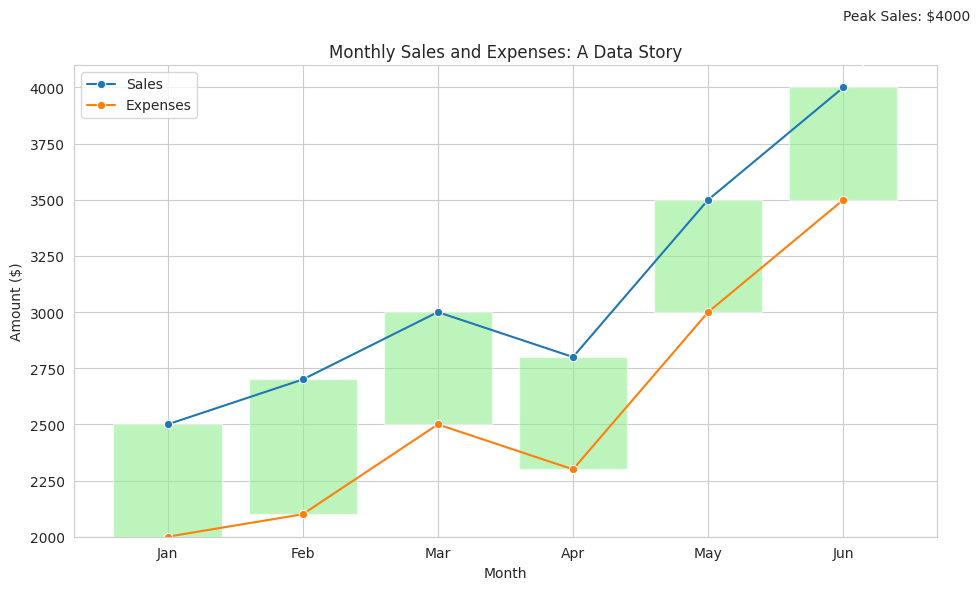

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample Data: Sales Data over Months
data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'],
    'Sales': [2500, 2700, 3000, 2800, 3500, 4000],
    'Expenses': [2000, 2100, 2500, 2300, 3000, 3500]
}

df = pd.DataFrame(data)

# Set style
sns.set_style('whitegrid')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot sales and expenses
sns.lineplot(x='Month', y='Sales', data=df, marker='o', label='Sales', ax=ax)
sns.lineplot(x='Month', y='Expenses', data=df, marker='o', label='Expenses', ax=ax)

# Add annotations for storytelling
max_sales = df['Sales'].max()
max_month = df.loc[df['Sales'].idxmax(), 'Month']
ax.annotate(f'Peak Sales: ${max_sales}',
            xy=(max_month, max_sales),
            xytext=(max_month, max_sales + 300),
            arrowprops=dict(facecolor='black', arrowstyle='->'))

# Highlight difference between sales and expenses
for idx, row in df.iterrows():
    ax.bar(row['Month'], row['Sales'] - row['Expenses'], bottom=row['Expenses'], color='lightgreen', alpha=0.6)

# Title and labels
ax.set_title('Monthly Sales and Expenses: A Data Story')
ax.set_ylabel('Amount ($)')
ax.set_xlabel('Month')

# Show plot
plt.legend()
plt.tight_layout()
plt.show()